# Regression Version of Classification Algorithms

Most of the classification algorithms we touched on have an analogous algorithm for regression problems.

## What we will accomplish

In this notebook we will:
- Learn about $k$ nearest neighbors regression,
- Introduce decision tree regression and
- Discuss support vector regression.

In [1]:
## For data handling
import pandas as pd
import numpy as np

## For plotting
import matplotlib.pyplot as plt
from seaborn import set_style

## This sets the plot style
## to have a grid on a white background
set_style("whitegrid")

For the theoretical setup for all of these models we will suppose that we have $n$ observations of $m$ features stored in a matrix, $X$, with $n$ corresponding outputs stored in a vector $y$.

## $k$ nearest neighbors regression

For this regression algorithm predictions are generated like so:
$$
f(X^*) = \frac{1}{k} \sum_{i\in \mathcal{N}^*} y^{(i)},
$$
where $\mathcal{N}^*$ denotes the set of indices of $X^*$'s $k$ closest neighbors in the dataspace.

So in summary you find the $k$-nearest neighbors of any point for which you would like a prediction, and then you find the arithmetic mean of their target values.

### In `sklearn`

$k$ nearest neighbors regression can be performed with `sklearn`'s `KNeighborsRegressor` model object, <a href="https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html">https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html</a>. 

Let's see how to implement this in `sklearn` with a return to our baseball data set. We will use this to plot the predictions on top of the training data for a $k$-nearest neighbors regression using $k=1$ and $k=10$. These will both be compared to our simple linear regression model regressing wins on run differential.

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
# Use pandas to import the data
# it is stored in the baseball_run_diff.csv file
ball = pd.read_csv("../../../Data/baseball_run_diff.csv")

ball_train, ball_test = train_test_split(ball.copy(),
                                            shuffle=True,
                                            random_state=403,
                                            test_size=.25)

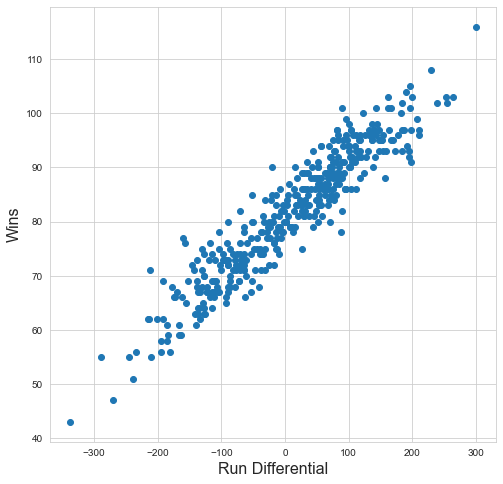

In [4]:
# first make a figure
plt.figure(figsize = (8,8))

# plt.scatter plots RD on the x and W on the y
plt.scatter(ball_train.RD, ball_train.W)

# Always good practice to label well when
# presenting a figure to others
# place an xlabel
plt.xlabel("Run Differential", fontsize =16)

# place a ylabel
plt.ylabel("Wins", fontsize = 16)

# type this to show the plot
plt.show()

In [5]:
## import knnr
from sklearn.neighbors import KNeighborsRegressor

## import LinearRegression
from sklearn.linear_model import LinearRegression

In [6]:
## make model objects
knr_1 = KNeighborsRegressor(1)
knr_10 = KNeighborsRegressor(10)
slr = LinearRegression(copy_X=True)


## Fit the models
knr_1 = knr_1.fit(ball_train.RD.values.reshape(-1,1),
                     ball_train.W.values)
knr_10 = knr_10.fit(ball_train.RD.values.reshape(-1,1),
                       ball_train.W.values)

slr.fit(ball_train.RD.values.reshape(-1,1),
             ball_train.W.values)

LinearRegression()

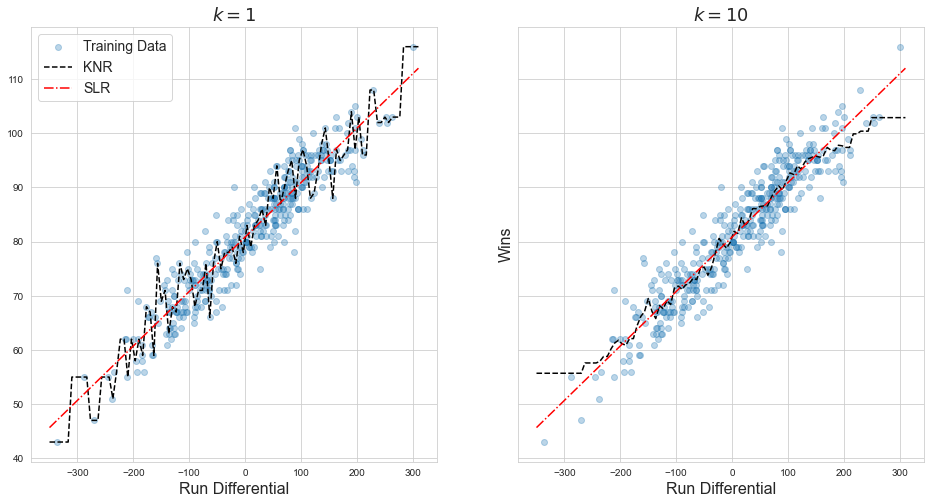

In [7]:
# first make a figure
# this makes a figure that is 10 units by 10 units
fig,ax = plt.subplots(1, 2, figsize = (16,8), sharex=True, sharey=True)

# scatter plots RD on the x and W on the y
ax[0].scatter(ball_train.RD, 
              ball_train.W,
              alpha = .3,
              label="Training Data")
ax[1].scatter(ball_train.RD, 
              ball_train.W,
              alpha = .3,
              label="Training Data")

ax[0].plot(np.linspace(-350,310,100),
           knr_1.predict(np.linspace(-350,310,100).reshape(-1,1)),
           'k--',
           label="KNR")

ax[0].plot(np.linspace(-350,310,100),
           slr.predict(np.linspace(-350,310,100).reshape(-1,1)),
           'r-.',
           label="SLR")

ax[1].plot(np.linspace(-350,310,100),
           knr_10.predict(np.linspace(-350,310,100).reshape(-1,1)),
           'k--',
           label="KNR")

ax[1].plot(np.linspace(-350,310,100),
           slr.predict(np.linspace(-350,310,100).reshape(-1,1)),
           'r-.',
           label="SLR")




# Always good practice to label well when
# presenting a figure to others
# place an xlabel
ax[0].set_xlabel("Run Differential", fontsize =16)
ax[1].set_xlabel("Run Differential", fontsize =16)


# place a ylabel
ax[1].set_ylabel("Wins", fontsize = 16)

## title
ax[0].set_title("$k=1$", fontsize=18)
ax[1].set_title("$k=10$", fontsize=18)

## add legend
ax[0].legend(fontsize=14)

# type this to show the plot
plt.show()

As is the case with $k$-nearest neighbors classifiers, you can find the optimal $k$ using a cross-validation approach.

You may be wondering why we would use $k$-nearest neighbors instead of simple linear regression.

Simple linear regression is known as a <i>parametric</i> technique (because we estimate a parameter, $\beta$), whereas $k$-nearest neighbors is a <i>nonparametric</i> technique (because we do not estimate any parameters).

Nonparametric techniques are sometimes useful when we cannot confirm the statistical assumptions of the parametric technique. Sometimes parametric techniques may not be appropriate. For instance, consider the case where there is clearly not a linear relationship between the features and target. Instead of guessing what powers or nonlinear transformations to use in the case of linear regression, you can use a nonparametric regression.

## Tree-based regression

Let's branch out by discussing tree-based regression.

Recall that with decision tree classifiers we use the CART algorithm, in which we search through a random subset of the features and use a binary search to obtain the feature-cutpoint pairing that reduces the impurity measure the most.

Tree-based regression does the same thing, but instead of Gini Impurity or Entropy the search is for the feature-cutpoint pairing that provides the greatest reduction in the MSE.

Once the tree is constructed all predictions are provided as follows.

Suppose we want to predict on a datapoint $X^*$. We first run $X^*$ through the decision tree. The prediction is then determined by averaging the target value over all the training points that ended up in the same terminal node.

### In `sklearn`

A decision tree regression can be implemented with `sklearn`'s  `DecisionTreeRegressor`, <a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor">https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor</a>. 

Again we demonstrate with our baseball data set. Note that the regressor has many of the same hyperparameter inputs as the decision tree classifier. We will build a model with a `max_depth` of $1$ and a `max_depth` of $5$ then plot both on top of the training data.

In [8]:
## import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

In [9]:
## make the model objects
tree_1 = DecisionTreeRegressor(max_depth = 1)
tree_5 = DecisionTreeRegressor(max_depth = 5)

## fit the objects
tree_1.fit(ball_train.RD.values.reshape(-1,1),
              ball_train.W.values)
tree_5.fit(ball_train.RD.values.reshape(-1,1),
              ball_train.W.values)

DecisionTreeRegressor(max_depth=5)

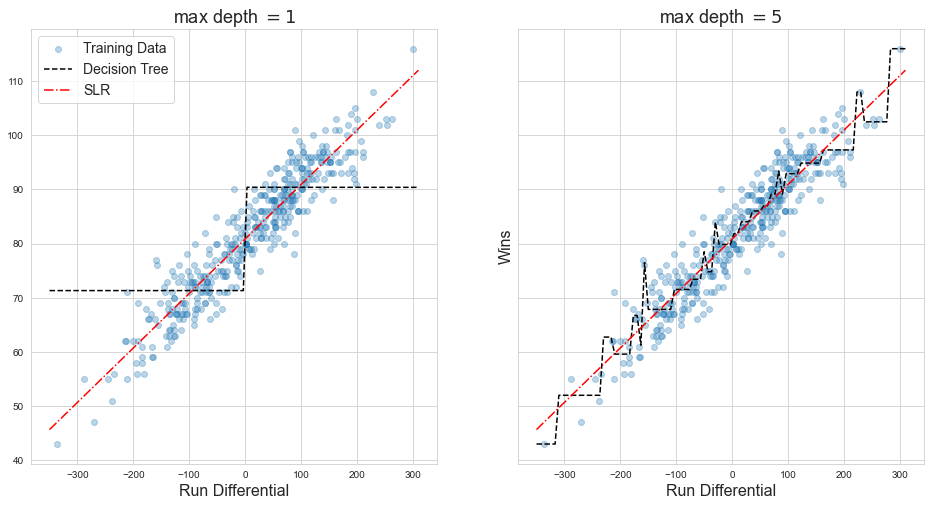

In [10]:
# first make a figure
# this makes a figure that is 10 units by 10 units
fig,ax = plt.subplots(1, 2, figsize = (16,8), sharex=True, sharey=True)

# scatter plots RD on the x and W on the y
ax[0].scatter(ball_train.RD, 
              ball_train.W,
              alpha = .3,
              label="Training Data")
ax[1].scatter(ball_train.RD, 
              ball_train.W,
              alpha = .3,
              label="Training Data")

ax[0].plot(np.linspace(-350,310,100),
           tree_1.predict(np.linspace(-350,310,100).reshape(-1,1)),
           'k--',
           label="Decision Tree")

ax[0].plot(np.linspace(-350,310,100),
           slr.predict(np.linspace(-350,310,100).reshape(-1,1)),
           'r-.',
           label="SLR")

ax[1].plot(np.linspace(-350,310,100),
           tree_5.predict(np.linspace(-350,310,100).reshape(-1,1)),
           'k--',
           label="Decision Tree")

ax[1].plot(np.linspace(-350,310,100),
           slr.predict(np.linspace(-350,310,100).reshape(-1,1)),
           'r-.',
           label="SLR")




# Always good practice to label well when
# presenting a figure to others
# place an xlabel
ax[0].set_xlabel("Run Differential", fontsize =16)
ax[1].set_xlabel("Run Differential", fontsize =16)


# place a ylabel
ax[1].set_ylabel("Wins", fontsize = 16)

## title
ax[0].set_title("max depth $= 1$", fontsize=18)
ax[1].set_title("max depth $= 5$", fontsize=18)

## add legend
ax[0].legend(fontsize=14)

# type this to show the plot
plt.show()

## Support vector regression

We end with the support vector machine version of regression.

The idea behind support vector regression draws upon the concept of a margin that we discussed in the the `Support Vector Machine` notebook. 

We assume that all observations $(X^{(i)},y^{(i)})$ are such that $y^{(i)} \in \left( f(X^{(i)}) - \epsilon, f(X^{(i)}) + \epsilon \right)$ for some function $f$ and some value $\epsilon$ that isn't too large (otherwise this assumption is pointless). In the linear formulation of the algorithm you assume that $f(X) = Xw$, i.e. the functional form is that of a hyperplane. The specific constrained optimization problem you want to solve in this set up is:

$$
\text{minimize } \frac{1}{2}||w||^2
$$

$$
\text{constrained to } |X^{(i)}w - y^{(i)}| \leq \epsilon \text{ for all training observations}.
$$

This set up is analogous to the maximal margin classifier. For the soft-margin version we add in slack variables, $\xi_i,\xi_i^*$, like so:

$$
\text{minimize } \frac{1}{2}||w||^2 + C \sum_{i}^n \left( \xi_i + \xi_i^* \right)
$$

$$
\text{constrained to } \left\lbrace \begin{array}{l}y^{(i)} - X^{(i)}w \leq \epsilon + \xi_i \\
X^{(i)}w - y^{(i)} \leq \epsilon + \xi_i^* \\
\xi_i, \xi_i^* \geq 0\end{array}\right. \text{ for all training observations},
$$

where:

$$
\xi_i = \left\lbrace \begin{array}{l l} 0 & \text{if } y_i - X^{(i)}w - \epsilon \leq 0 \\
y^{(i)} - X^{(i)}w - \epsilon & \text{else} \end{array} \right.,
$$

$$
\xi_i^* = \left\lbrace \begin{array}{l l} 0 & \text{if } X^{(i)}w - y^{(i)}  - \epsilon  \leq 0 \\
X^{(i)}w - y^{(i)}  - \epsilon  & \text{else} \end{array} \right.
$$

To help explain let's examine this picture from <a href="https://cs.adelaide.edu.au/~chhshen/teaching/ML_SVR.pdf">https://cs.adelaide.edu.au/~chhshen/teaching/ML_SVR.pdf</a>
<img src="SVRpic.png" width = "50%"></img>

In this soft margin approach we're only penalizing the cost function by those observations that exceed the $\epsilon$-margin we've set.

### In `sklearn`

This model can be implemented in `sklearn` with `LinearSVR`, <a href="https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVR.html#sklearn.svm.LinearSVR">https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVR.html#sklearn.svm.LinearSVR</a>. More generally you can use `SVR`, <a href="https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html">https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html</a>, which again uses the kernel trick to lift the data to a higher dimensional space, but we will stick with the linear version for this demonstration.

Let's use this to regress wins on run differential and compare the result to simple linear regression for different values of $\epsilon$.

In [11]:
## import LinearSVR
from sklearn.svm import LinearSVR

In [12]:
## We will use this function to compare different values of epsilon

## Use this function to play around with epsilon below
## svr should be your model object, epsilon your desired epsilon value
def plot_svr(svr, epsilon):
    ## fitting the model
    svr.fit(ball_train.RD.values.reshape(-1,1),
               ball_train.W.values)
    
    # first make a figure
    # this makes a figure that is 10 units by 10 units
    plt.figure(figsize = (10,10))

    # plt.scatter plots RD on the x and W on the y
    plt.scatter(ball_train.RD.values.reshape(-1,1), 
                ball_train.W.values, 
                alpha=.3)

    ## plot your two prediction lines here
    plt.plot(np.linspace(-350,310,100),
                svr.predict(np.linspace(-350,310,100).reshape(-1,1)),
                'k-',
                label = "SVR")
    plt.plot(np.linspace(-350,310,100),
                svr.predict(np.linspace(-350,310,100).reshape(-1,1)) - epsilon,
                'k--',
                label = "Epsilon Bound")
    plt.plot(np.linspace(-350,310,100),
                svr.predict(np.linspace(-350,310,100).reshape(-1,1)) + epsilon,
                'k--')
    
    plt.plot(np.linspace(-350,310,100),
                slr.predict(np.linspace(-350,310,100).reshape(-1,1)),
                'r-.',
                label="SLR")
    # Always good practice to label well when
    # presenting a figure to others
    # place an xlabel
    plt.xlabel("Run Differential", fontsize =16)

    # place a ylabel
    plt.ylabel("Wins", fontsize = 16)
    
    plt.title("$\epsilon = $" + str(epsilon), fontsize=20)

    plt.legend(fontsize=16)

    # type this to show the plot
    plt.show()

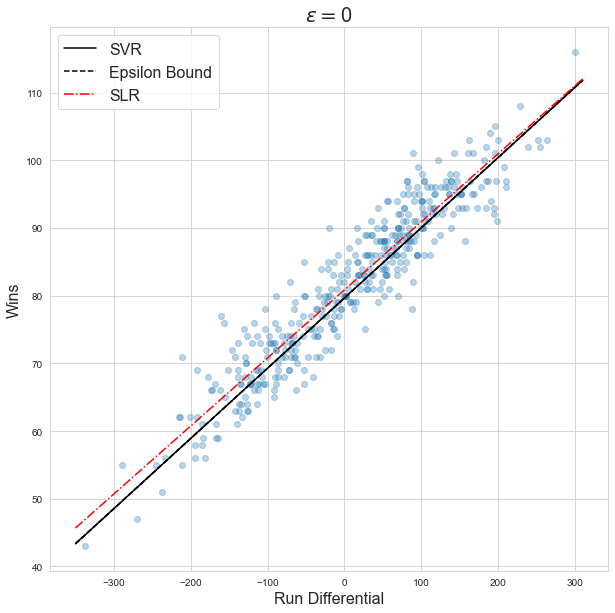

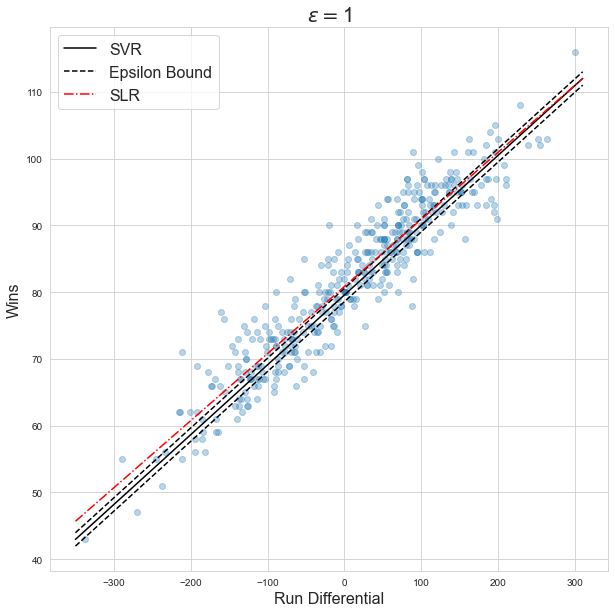

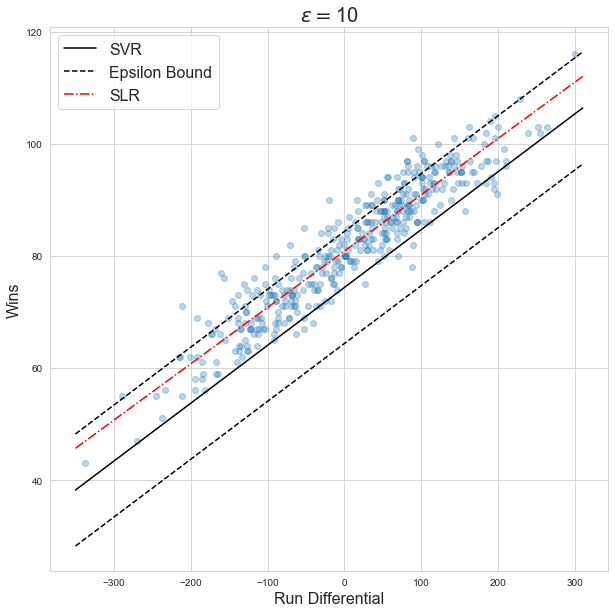

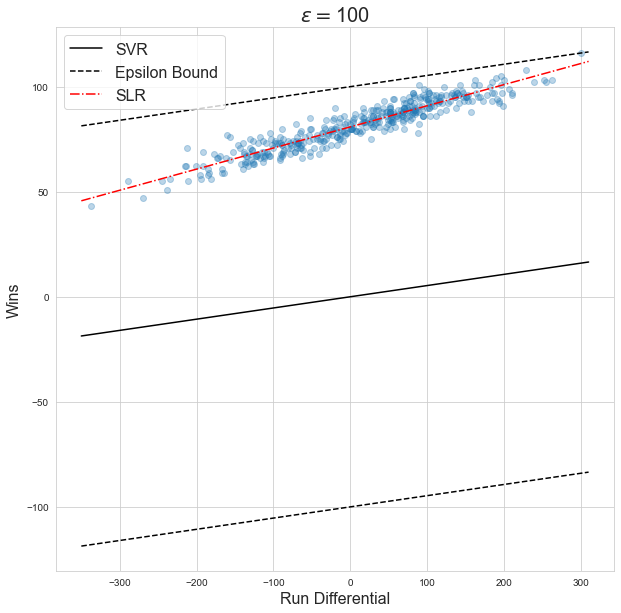

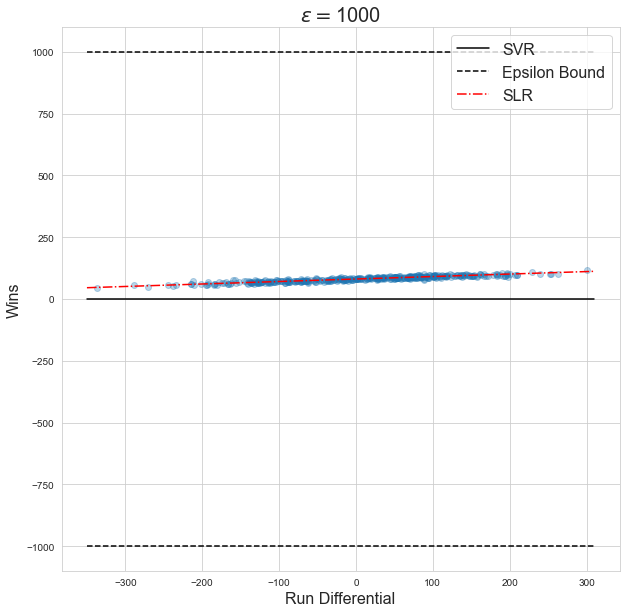

In [13]:
## epsilon = 0
epsilon = 0

plot_svr(LinearSVR(C=1, epsilon=epsilon, max_iter=100000), epsilon)

## epsilon = 1
epsilon = 1

plot_svr(LinearSVR(C=1, epsilon=epsilon, max_iter=100000), epsilon)

## epsilon = 10
epsilon = 10

plot_svr(LinearSVR(C=1, epsilon=epsilon, max_iter=100000), epsilon)

## epsilon = 100
epsilon = 100

plot_svr(LinearSVR(C=1, epsilon=epsilon, max_iter=100000), epsilon)

## epsilon = 1000
epsilon = 1000

plot_svr(LinearSVR(C=1, epsilon=epsilon, max_iter=100000), epsilon)

As we increase $\epsilon$ we have a wider band in which to fit our data points. Since the only terms that contribute to the cost function are those outside of the band the algorithm will find a $w$ so that $w$ is as close to $0$ while fitting all of the points within the $\epsilon$ band. So if $\epsilon$ is large enough we will get a horizontal line from support vector regression.

Extra Support Vector Sources:
- <a href="https://cs.adelaide.edu.au/~chhshen/teaching/ML_SVR.pdf">https://cs.adelaide.edu.au/~chhshen/teaching/ML_SVR.pdf</a>
- <a href="https://alex.smola.org/papers/2003/SmoSch03b.pdf">https://alex.smola.org/papers/2003/SmoSch03b.pdf</a>
- <a href="https://stats.stackexchange.com/questions/82044/how-does-support-vector-regression-work-intuitively">https://stats.stackexchange.com/questions/82044/how-does-support-vector-regression-work-intuitively</a>
- <a href="https://stats.stackexchange.com/questions/198199/how-different-is-support-vector-regression-compared-to-svm">https://stats.stackexchange.com/questions/198199/how-different-is-support-vector-regression-compared-to-svm</a>

<i>Note that while we focused on a regression problem with a single predictor in this notebook, all of these techniques can handle multiple predictors as well</i>.

--------------------------

This notebook was written for the Erd&#337;s Institute C&#337;de Data Science Boot Camp by Matthew Osborne, Ph. D., 2022.

Any potential redistributors must seek and receive permission from Matthew Tyler Osborne, Ph.D. prior to redistribution. Redistribution of the material contained in this repository is conditional on acknowledgement of Matthew Tyler Osborne, Ph.D.'s original authorship and sponsorship of the Erdős Institute as subject to the license (see License.md)